# Your Instagram Data Dashboard
Here is an overview of information about you that we received from your Instagram data. 


In [1]:
import os 
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from PIL import Image
import cv2
os.sys.path
import ipyplot
import pandas as pd 
from textblob import TextBlob

The graph below shows your top five favorite instagram accounts. Your 'favorite' accounts are the accounts with the highest number of posts you have liked since your account has been active. 

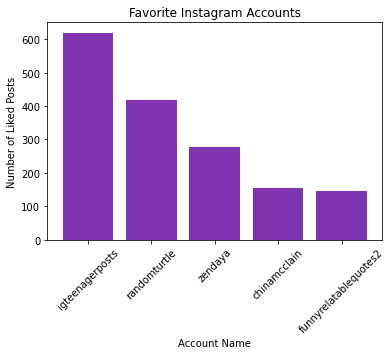

In [2]:
#Read in liked_posts.json file
with open('./data/nia_ig_data/likes/liked_posts.json') as like_data:
    liked_posts_json = json.load(like_data)

#Parse through the liked_posts.json file to take count of all of the posts I've liked and which account they belong to
liked_posts = []
for like in liked_posts_json['likes_media_likes']:
    liked_posts.append((like['title']))
top_liked_accounts = (Counter(liked_posts).most_common(5))
account_name = list(zip(*top_liked_accounts))[0]
num_liked_posts = list(zip(*top_liked_accounts))[1]

#Create a barplot to display my top 5 favorite accounts 
x_pos = np.arange(len(account_name))
plt.bar(x_pos, num_liked_posts,align='center',color='#8134AF')
plt.rcParams.update({'font.size': 10})
plt.xticks(x_pos, account_name) 
plt.xticks(rotation=45)
plt.title("Favorite Instagram Accounts")
plt.xlabel('Account Name')
plt.ylabel('Number of Liked Posts')
plt.show()

In [3]:
#Personal Information =(Username, Email, Phone Number, Gender)
with open('./data/nia_ig_data/account_information/personal_information.json') as ads_interests_data:
    personal_information_json = json.load(ads_interests_data)
    
user_name = personal_information_json['profile_user'][0]['string_map_data']['Username']['value']
try:
    phone_number = personal_information_json['profile_user'][0]['string_map_data']['Phone Number']['value']
except: 
    phone_number = "not confirmed"
email = personal_information_json['profile_user'][0]['string_map_data']['Email']['value']
gender = personal_information_json['profile_user'][0]['string_map_data']['Gender']['value']


In [4]:
#Primary Account Location
with open('./data/nia_ig_data/information_about_you/account_based_in.json') as ads_interests_data:
    account_based_json = json.load(ads_interests_data)
primary_account_location = account_based_json['inferred_data_primary_location'][0]['string_map_data']['City Name']['value']

In [5]:
import pandas as pd
data = {'Category':['Username', 'Phone Number', 'Email', 'Gender', 'Primary Account Location'],
        'Your Information':[user_name, phone_number, email, gender, primary_account_location]}
df_personal_info = pd.DataFrame(data)
df_personal_info = df_personal_info.style.set_properties(subset=["Category", "Your Information"], **{'text-align': 'left'}).hide_index()

df_personal_info

Category,Your Information
Username,nia.dinay
Phone Number,+17082080999
Email,nia_graygirl2@yahoo.com
Gender,female
Primary Account Location,"Ann Arbor, Michigan"


In [6]:
#Number of Advertisers Using Your Info
with open('./data/nia_ig_data/ads_and_businesses/advertisers_using_your_activity_or_information.json') as ads_interests_data:
    advertisers_using_json = json.load(ads_interests_data)
    
num_advertisers_using_data = len(advertisers_using_json['ig_custom_audiences_all_types'])

In [7]:
#Size of File
def get_size(start_path = './data/nia_ig_data'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size*(0.000001)

data_size = round(get_size())

In [8]:
print("Instagram has collected a total of " + str(data_size) + " megabytes of data about you. There are " + str(num_advertisers_using_data) + " advertisers using your Instagram data.")

Instagram has collected a total of 286 megabytes of data about you. There are 88 advertisers using your Instagram data.


Below are all your archived pictures.


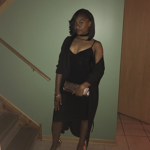
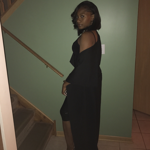
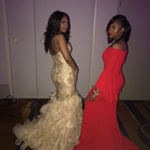
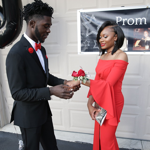
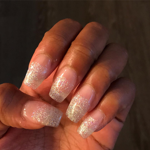
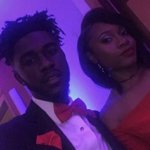
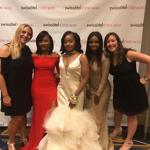
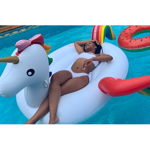
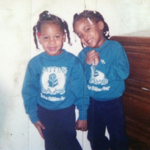
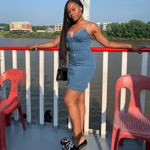
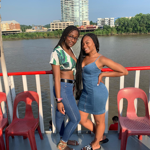
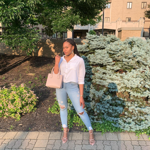
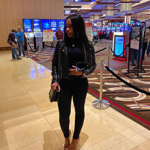
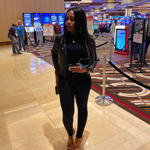
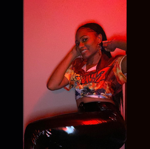
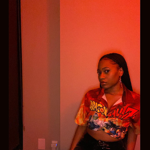
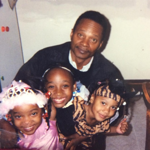
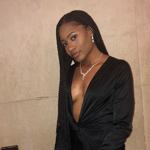
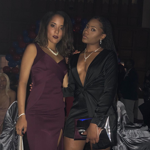
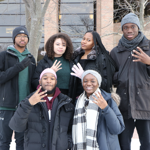
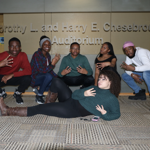
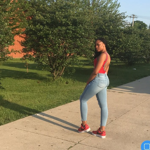
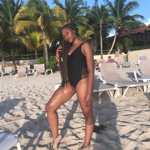
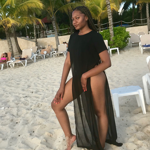
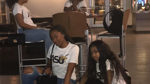
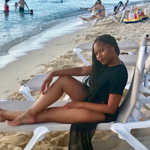
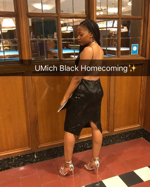
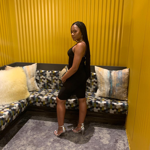
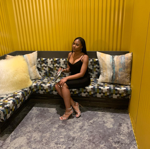
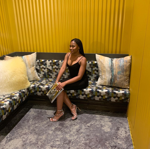


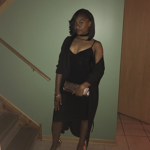
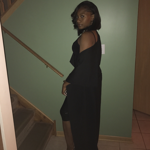
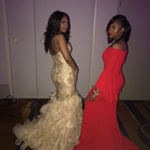
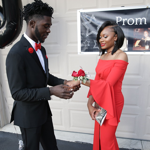
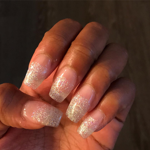
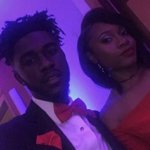
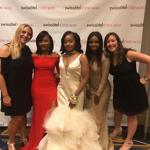
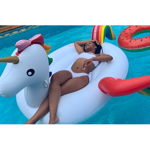
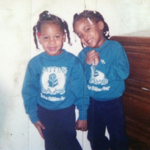
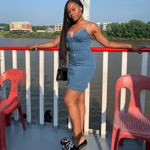
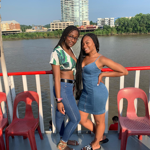
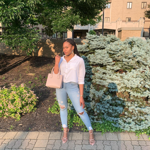
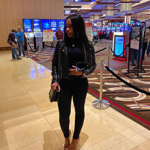
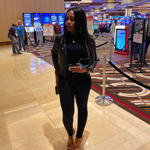
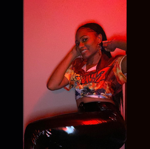
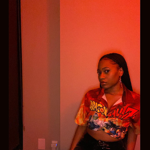
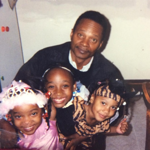
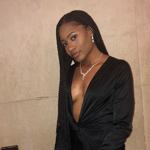
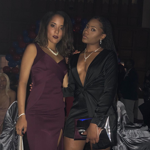
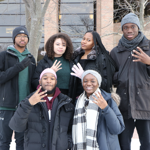
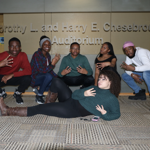
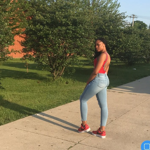
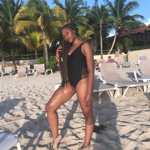
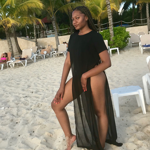
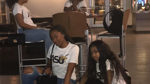
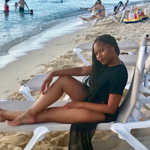
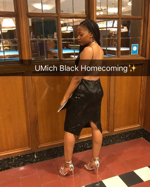
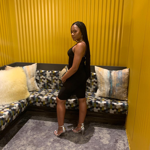
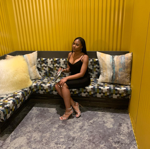
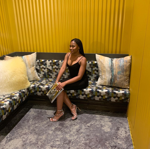

In [9]:
#Display a user's archived photos
image_paths = []
# assign directory
directory = "./data/nia_ig_data/media/archived_posts"
 
# iterate over folders in the archived_posts folders
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
   
    # checking if it is an image file
    try:
        int(filename)
        for picture in os.listdir(directory+"/"+filename):
            if ".jpg" in picture:
                image_paths.append(directory+"/"+filename+"/"+picture) 
            
    except ValueError:
        pass 

file_names = image_paths

images = []

for name in file_names:
    image = cv2.imread(name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
    images.append(pixels)
    
ipyplot.plot_images(images,max_images=100, img_width=150)


The table below shows the oldest Instagram comment you left on a user's post.

In [10]:
#Oldest comment 
with open('./data/nia_ig_data/comments/post_comments.json') as post_comments:
    post_comments_json = json.load(post_comments)

post_comments_json['comments_media_comments'][-1]
oldest_comment_user = post_comments_json['comments_media_comments'][-1]['title']
oldest_comment = post_comments_json['comments_media_comments'][-1]['string_list_data'][0]['value']
(oldest_comment_user, oldest_comment)


df_oldest_comment = pd.DataFrame({'Oldest Comment': [oldest_comment_user, oldest_comment]},
                  index=['Post Account Owner','Your Comment'])

df_oldest_comment = df_oldest_comment.style.set_properties(**{'text-align': 'left'})
df_oldest_comment


,Oldest Comment
Post Account Owner,zendaya
Your Comment,I might have to borrow dem


The following table shows your comments that were longer than 100 characters. 

In [11]:
#Get all Instagram comments into one list
comment_list = []
list_of_dic = post_comments_json['comments_media_comments']
for index in range(len(list_of_dic)):
    comment_list.append(list_of_dic[index]['string_list_data'][0]['value'])

long_comments = []
import string 
for comment in comment_list:
    comment = comment.encode("ascii", "ignore").decode()
    if len(comment) > 100:
            long_comments.append(comment)

#Put longest comments in dataframe
df_long_comment = pd.DataFrame({'Long Comments': long_comments})
df_long_comment = df_long_comment.style.set_properties(**{'text-align': 'left'}).hide_index()

df_long_comment

Long Comments
"@gorgetta.goff As Ive stated before, nobody asked for your opinion and I surely didnt ask for your dance credentials. You couldve came out the womb doing pirouettes and that still doesnt give you the right to harass people for the content that they post on their page. Your commentary was far from constructive and unwarranted. At the end of the day youre spiteful and weird. Have a nice day and go find something more constructive to do with your time."
@gorgetta.goff Youre the one who made a fake page to share your useless opinion that nobody asked for. Clearly something isnt clicking for you. Next time you should evaluate why someone elses confidence and happiness bothers you so much instead of spreading negativity.
"@blue_is_royalty7 Whats really sad and sick is how you chose to sit on this app and spew negativity about another womans body unprovoked like you some kind of cleavage cop. If you wanna wear a turtleneck every day thats your choice, but you have no right to speak on what somebody else is wearing."
"I am beyond touched and honored! My NSBE f4m always keeps me on track and striving for excellence. I couldnt make it through Michigan without yall, I love you guys so much!! Thanks everybody"
"Im excited to secure the bag at career fair, and to be surrounded by Black excellence!! #NSBE45 #ExploreEngineerElevate #OpeningSession"
You're right I have nothing better to do and you're being very entertaining right now I find it funny that you're getting angry because I said my opinion and tagged you in it @lakaay
I'm done with you and with pictures like that you should consider putting your page on private bye @phxckyo_world
"Ok @_thec00lest can @ whoever she wants to, and my opinion is that you have having nothing better to do than entertain yourself by putting rude comments on pictures and arguing with teenagers @lakaay"
"Ma'am no one was using suggestive language here so watch your mouth when address me okay. And if you really have a life you should take some time out of it learning how to spell, ok sweetheart. @phxckyo_world"
Y'all wasting time arguing with teenagers and y'all look like grown ass women #sad and #pitiful get a life @phxckyo_world @lakaay


Sentiment is view of or attitude toward a situation or event; an opinion. The following table shows your top five negative and top five positive comments based on a sentiment analysis. Please note that the sentiment analyser can only analyze if the words in your comment have a positive or negative meaning. Not if you are using the words in a positive or negative way. Therefore, if you use words in ways other than their intended meanings, your comment selection may not be as "negative" or "positive" as expected. 

In [12]:
#Comment Sentiment Analysis 

#Read comments to a dataframe
df_sentiment_analysis = pd.DataFrame(comment_list, columns = ['Comment'])

#Function to remove non-ASCII from comments 
def remove_non_ascii(text): 
    return ''.join(i for i in text if ord(i)<128) 
df_sentiment_analysis['Comment'] = df_sentiment_analysis['Comment'].apply(remove_non_ascii) 


#Data preprocessing
df_sentiment_analysis['Comment'] = df_sentiment_analysis['Comment'].astype(str)
df_sentiment_analysis['Comment'] = df_sentiment_analysis['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_sentiment_analysis['Comment'] = df_sentiment_analysis['Comment'].str.replace(r'[^\w\s]+', '')

# Define a function which can be applied to calculate the sentiment score for the whole dataset
# The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is 
# float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative 
# statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas 
# objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
mask = (df_sentiment_analysis['Comment'].str.len() >= 50)
df_sentiment_analysis = df_sentiment_analysis.loc[mask]
def senti(x):
    return TextBlob(x).sentiment  
df_sentiment_analysis['Sentiment_Score'] = df_sentiment_analysis['Comment'].apply(senti)

#Create separate columns for Polarity and Subjectivity Scores 
df_sentiment_analysis[['Polarity', 'Subjectivity']] = pd.DataFrame(df_sentiment_analysis['Sentiment_Score'].tolist(), index=df_sentiment_analysis.index) 

#Rank comments by sentiment, and then list top 5 negative and top 5 positive comments in a dataframe
df_sentiment_analysis = df_sentiment_analysis.sort_values('Sentiment_Score')
top_5_negative = []
negative_index_list = list(df_sentiment_analysis.head(5).index)
for idx in negative_index_list:
    top_5_negative.append(comment_list[idx].encode("ascii", "ignore").decode())
top_5_positive = []
positive_index_list = list(df_sentiment_analysis.tail(5).index)
for idx in positive_index_list:
    top_5_positive.append(comment_list[idx].encode("ascii", "ignore").decode())
df_pos_neg_comments = pd.DataFrame({'5 Most Negative Comments': top_5_negative, '5 Most Positive Comments': top_5_positive})
pd.set_option('display.max_colwidth', None)
df_pos_neg_comments = df_pos_neg_comments.style.set_properties(**{'text-align': 'left'}).hide_index()
df_pos_neg_comments

5 Most Negative Comments,5 Most Positive Comments
Y'all wasting time arguing with teenagers and y'all look like grown ass women #sad and #pitiful get a life @phxckyo_world @lakaay,Ik but some of these comments are hilarious @maat_bates927
@naejamre26 so are you talking about us or @phxckyo_world because I'm confused here,U asked if u were talking to me and I said no but I'm talking to you understand. You're not tht bright are u? @brunopluto
I asked my ma for one of them shirts but she said no cus it sounds rude,Lol Ikr she skinny but not tht skinny it kinda looked photoshopped @themockingjaay
Tht bus driver last year confused the heck out of me @ichange4no_one,"OMGG yayyyy, Im so happy for you! Know we can be reunited"
"@blue_is_royalty7 Whats really sad and sick is how you chose to sit on this app and spew negativity about another womans body unprovoked like you some kind of cleavage cop. If you wanna wear a turtleneck every day thats your choice, but you have no right to speak on what somebody else is wearing.","Out here living your best life, I cried for nothing!!"


In [13]:
df_sentiment_analysis


,Comment,Sentiment_Score,Polarity,Subjectivity
242,yall wasting time arguing with teenagers and yall look like grown ass women sad and pitiful get a life phxckyo_world lakaay,"(-0.5, 1.0)",-5.000000e-01,1.000000
240,naejamre26 so are you talking about us or phxckyo_world because im confused here,"(-0.4, 0.7)",-4.000000e-01,0.700000
318,i asked my ma for one of them shirts but she said no cus it sounds rude,"(-0.3, 0.6)",-3.000000e-01,0.600000
303,tht bus driver last year confused the heck out of me ichange4no_one,"(-0.2, 0.3833333333333333)",-2.000000e-01,0.383333
40,blue_is_royalty7 whats really sad and sick is how you chose to sit on this app and spew negativity about another womans body unprovoked like you some kind of cleavage cop if you wanna wear a turtleneck every day thats your choice but you have no right to speak on what somebody else is wearing,"(-0.18928571428571433, 0.8232142857142857)",-1.892857e-01,0.823214
224,these look like the ones that lady had when she flew down the steps _thec00lest,"(-0.15555555555555559, 0.2888888888888889)",-1.555556e-01,0.288889
191,dang how big is jalene now my bad if i aint spell it right,"(-0.13809523809523805, 0.4341269841269841)",-1.380952e-01,0.434127
295,ok since youre a little kid and i think you have some serious issues im just going to leave you only because something is wrong with you brunopluto,"(-0.10416666666666666, 0.7133333333333333)",-1.041667e-01,0.713333
52,itsbakey_ im definitely the one that gets us into trouble,"(-0.1, 0.35)",-1.000000e-01,0.350000
197,yea girl you crazy i made sure i did that yesterday,"(-0.04999999999999999, 0.8944444444444444)",-5.000000e-02,0.894444


The pie chart below shows the percentages of positive, negative, and neutral comments that you've left on other user's posts. 

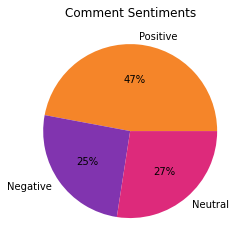

In [14]:
#Calculate percentage of positive, negative, and neutral comments 
positive_percentage = df_sentiment_analysis.loc[df_sentiment_analysis['Polarity'] > 0,'Polarity'].count()/df_sentiment_analysis['Polarity'].count()
negative_percentage = df_sentiment_analysis.loc[df_sentiment_analysis['Polarity'] < 0,'Polarity'].count()/df_sentiment_analysis['Polarity'].count()
neutral_percentage = df_sentiment_analysis.loc[df_sentiment_analysis['Polarity'] == 0,'Polarity'].count()/df_sentiment_analysis['Polarity'].count()

#Display pie chart with the information above
y = np.array([positive_percentage*100, negative_percentage*100, neutral_percentage*100])
mylabels = ["Positive", "Negative", "Neutral"]
colors = ['#f58529','#8134af','#dd2a7b']
sizes = np.array([positive_percentage*100, negative_percentage*100, neutral_percentage*100])
plt.title("Comment Sentiments")
plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show() 